In [1]:
import pandas as pd
import os
import pathlib
import sys
from Bio import SeqIO

root = pathlib.Path("__file__").absolute().parents[2]
os.chdir(root)
sys.path.insert(0, str(root))
root

PosixPath('/rxrx/data/user/lu.zhu/polaris-recipes')

In [3]:
# load binding data
binding_df = pd.read_csv(
    "/mnt/ps/home/CORP/lu.zhu/project/polaris-recipes/org-AdaptyvBio/EGFR_binders/Competition_ Binders to EGFR_summary.csv"
)
binding_df

,name,replicate,expression,binding,confidence,kd,kon,koff,sequence
0,Cetuximab_scFv,1,low,True,high,3.332385e-09,1.514751e+06,0.005048,QVQLKQSGPGLVQPSQSLSITCTVSGFSLTNYGVHWVRQSPGKGLE...
1,Cetuximab_scFv,2,low,True,high,9.944305e-09,3.814592e+05,0.003793,QVQLKQSGPGLVQPSQSLSITCTVSGFSLTNYGVHWVRQSPGKGLE...
2,Razora712-sequence_10,1,high,False,low,NaN,NaN,NaN,EELKKALQALKKEYRDKQWAVVQEMLKQHAEIAKKKEAGEINEKEA...
3,Razora712-sequence_10,2,high,False,low,NaN,NaN,NaN,EELKKALQALKKEYRDKQWAVVQEMLKQHAEIAKKKEAGEINEKEA...
4,Razora712-sequence_2,1,high,False,low,NaN,NaN,NaN,RVKELEEEAKRKADEAEELKKRIDALQAKFNELLAAAKASSDPRKS...
...,...,...,...,...,...,...,...,...,...
456,zalavi-egfr_binder3,2,high,False,low,NaN,NaN,NaN,SEEAKELKEKAKEKLKEALEKAKEALKDAEKAAEILKKIPEAKEAL...
457,zalavi-egfr_binder7,1,high,False,low,NaN,NaN,NaN,AQAAAKETIRAVLKAAAEAARKMAEEARKLAKELEKYNKEAAKHAL...
458,zalavi-egfr_binder7,2,high,False,low,NaN,NaN,NaN,AQAAAKETIRAVLKAAAEAARKMAEEARKLAKELEKYNKEAAKHAL...
459,zalavi-egfr_binder8,1,high,False,low,NaN,NaN,NaN,IDEKKKEEYESLATELNAQAKALKAQADATGSQTYANFATAASDAA...


In [6]:
binding_df.describe(include="all")

,name,replicate,expression,binding,confidence,kd,kon,koff,sequence
count,461,461.000000,461,461,299,1.800000e+01,9.000000e+00,9.000000,461
unique,202,NaN,4,4,2,NaN,NaN,NaN,202
top,mw88-1_BACK_INTER_ENERGY1,NaN,high,False,low,NaN,NaN,NaN,HAHVTQSPVILSVSPGERVSFSCRAQARIMVFFHWYQQRTNGSPRL...
freq,4,NaN,223,281,280,NaN,NaN,NaN,4
mean,NaN,1.696312,NaN,NaN,NaN,6.668644e-06,2.651878e+05,0.006361,NaN
std,NaN,0.706313,NaN,NaN,NaN,9.111032e-06,4.821003e+05,0.002461,NaN
min,NaN,1.000000,NaN,NaN,NaN,3.332385e-09,1.705854e+04,0.002806,NaN
25%,NaN,1.000000,NaN,NaN,NaN,6.221859e-08,2.164833e+04,0.004720,NaN
50%,NaN,2.000000,NaN,NaN,NaN,2.461137e-06,9.440264e+04,0.006025,NaN
75%,NaN,2.000000,NaN,NaN,NaN,1.000000e-05,1.506942e+05,0.008390,NaN


<Axes: >

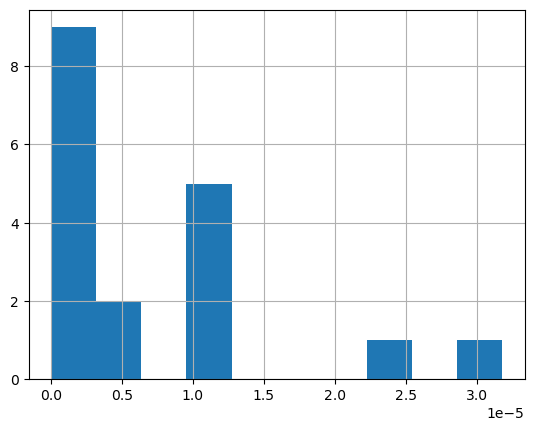

In [14]:
binding_df.kd.hist()

In [46]:
mean_kd = binding_df.groupby("name").kd.mean()

In [47]:
mean_kd

name
Cetuximab_scFv           6.638345e-09
Razora712-sequence_10             NaN
Razora712-sequence_2              NaN
Razora712-sequence_3              NaN
Razora712-sequence_6              NaN
                             ...     
x.rustamov-s_11_5                 NaN
x.rustamov-s_15_28                NaN
zalavi-egfr_binder3               NaN
zalavi-egfr_binder7               NaN
zalavi-egfr_binder8               NaN
Name: kd, Length: 202, dtype: float64

In [48]:
binding_df_bis = binding_df.drop_duplicates(subset=["name", "sequence"]).reset_index(
    drop=True
)
binding_df_bis["kd_mean"] = mean_kd.loc[binding_df_bis.name].values

In [54]:
binding_df_bis.sort_values(by="kd_mean", ascending=True, inplace=True)

In [56]:
binding_df.sort_values(by="kd", ascending=True).head(20)

,name,replicate,expression,binding,confidence,kd,kon,koff,sequence
0,Cetuximab_scFv,1,low,True,high,3.332385e-09,1.514751e+06,0.005048,QVQLKQSGPGLVQPSQSLSITCTVSGFSLTNYGVHWVRQSPGKGLE...
1,Cetuximab_scFv,2,low,True,high,9.944305e-09,3.814592e+05,0.003793,QVQLKQSGPGLVQPSQSLSITCTVSGFSLTNYGVHWVRQSPGKGLE...
15,ahmedsameh-Q3,2,medium,True,high,3.132084e-08,1.506942e+05,0.004720,WVQLQESGGGLVQPGGSLRLSCAASGRTFSSYAMGWFRQAPGKQRE...
14,ahmedsameh-Q3,1,medium,True,high,4.256292e-08,6.591872e+04,0.002806,WVQLQESGGGLVQPGGSLRLSCAASGRTFSSYAMGWFRQAPGKQRE...
25,ahmedsameh-yy2,1,medium,True,high,6.168328e-08,1.236377e+05,0.007626,QVQLQESGGGLVQPGGSLRLSCAASGRTFSSHAMGWFRQAPGKQRE...
26,ahmedsameh-yy2,2,medium,True,high,6.382452e-08,9.440264e+04,0.006025,QVQLQESGGGLVQPGGSLRLSCAASGRTFSSHAMGWFRQAPGKQRE...
284,martin.pacesa-EGFR_l138_s90285_mpnn2,1,high,True,high,4.517654e-07,2.164833e+04,0.009780,SPFDLFLDRLPEQDPEMTEEGKWWAEEMKRMVGPHFEELEEYIRNN...
286,martin.pacesa-EGFR_l138_s90285_mpnn2,3,high,True,high,4.900566e-07,1.712007e+04,0.008390,SPFDLFLDRLPEQDPEMTEEGKWWAEEMKRMVGPHFEELEEYIRNN...
285,martin.pacesa-EGFR_l138_s90285_mpnn2,2,high,True,high,5.310023e-07,1.705854e+04,0.009058,SPFDLFLDRLPEQDPEMTEEGKWWAEEMKRMVGPHFEELEEYIRNN...
448,x.rustamov-m_18_41,2,high,True,high,4.391272e-06,NaN,NaN,SAGQAQIEEVKARADKAKTLEELKELRKEAYEKNWKAYMAVVDETE...


In [58]:
binding_df_bis.head(10)

,name,replicate,expression,binding,confidence,kd,kon,koff,sequence,kd_mean
0,Cetuximab_scFv,1,low,True,high,3.332385e-09,1.514751e+06,0.005048,QVQLKQSGPGLVQPSQSLSITCTVSGFSLTNYGVHWVRQSPGKGLE...,6.638345e-09
1,ahmedsameh-Q3,2,medium,True,high,3.132084e-08,1.506942e+05,0.004720,WVQLQESGGGLVQPGGSLRLSCAASGRTFSSYAMGWFRQAPGKQRE...,3.694188e-08
2,ahmedsameh-yy2,1,medium,True,high,6.168328e-08,1.236377e+05,0.007626,QVQLQESGGGLVQPGGSLRLSCAASGRTFSSHAMGWFRQAPGKQRE...,6.275390e-08
3,martin.pacesa-EGFR_l138_s90285_mpnn2,1,high,True,high,4.517654e-07,2.164833e+04,0.009780,SPFDLFLDRLPEQDPEMTEEGKWWAEEMKRMVGPHFEELEEYIRNN...,4.909414e-07
4,x.rustamov-m_18_41,2,high,True,high,4.391272e-06,NaN,NaN,SAGQAQIEEVKARADKAKTLEELKELRKEAYEKNWKAYMAVVDETE...,4.773972e-06
5,alecl-Sequence1,1,high,weak,high,1.000000e-05,NaN,NaN,SVDEECPASYEGFCQNDGTCLYLEKLDRYACRCREGYIGERCEFRD...,1.000000e-05
6,alan.blakely-design:5 n:6|mpnn:1.247|plddt:0.8...,2,high,weak,high,1.000000e-05,NaN,NaN,DSECPLSHDGYCLHDGVCMYIEALDKYACNCVVGYIGERCQYRDLK...,1.000000e-05
7,adrian.tripp-egfr_cetuxi_0133_0002_A,1,high,True,high,1.261557e-05,NaN,NaN,MAKLIIANSEEALKEYLEKLGEEAKDYEKVVVPLGDGSVVQSAQNA...,2.293405e-05
8,Razora712-sequence_10,1,high,False,low,NaN,NaN,NaN,EELKKALQALKKEYRDKQWAVVQEMLKQHAEIAKKKEAGEINEKEA...,NaN
9,Razora712-sequence_2,1,high,False,low,NaN,NaN,NaN,RVKELEEEAKRKADEAEELKKRIDALQAKFNELLAAAKASSDPRKS...,NaN


<Axes: >

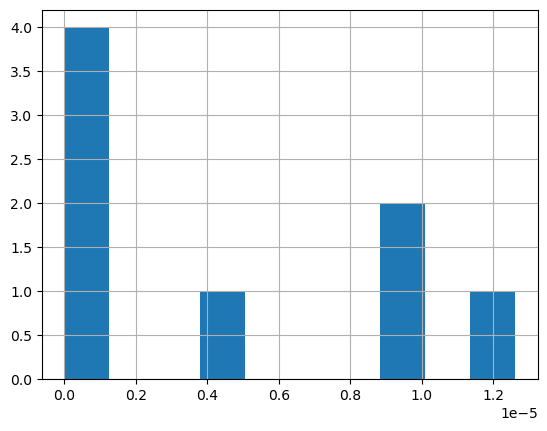

In [52]:
binding_df_bis.kd.hist()

In [39]:
binding_df_bis.to_csv(
    "org-AdaptyvBio/EGFR_binders/Competition_ Binders to EGFR_mean.csv", index=False
)